<a href="https://colab.research.google.com/github/MiggieCS911/DrugRepuposingSGLT2i/blob/main/SummaryResultSGLT2_show.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

open active data from XGBoost model

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/AI for drug/block_SGLT2/data/active0_10000XGB.csv')
df2 = pd.read_csv('/content/drive/MyDrive/AI for drug/block_SGLT2/data/active10000_20000XGB.csv')
df3 = pd.read_csv('/content/drive/MyDrive/AI for drug/block_SGLT2/data/active12000_20000XGB.csv')
df4 = pd.read_csv('/content/drive/MyDrive/AI for drug/block_SGLT2/data/active20000_40000XGB.csv')
df5 = pd.read_csv('/content/drive/MyDrive/AI for drug/block_SGLT2/data/active40000_60000XGB.csv')
concatlist = [df1,df2,df3,df4,df5]
df = pd.concat(concatlist)

In [ ]:
df

,smiles,prob_active
0,COc1ccc(F)cc1S(=O)(=O)Nc1cnc2ccccc2c1,0.632879
1,Clc1cccc(Nc2nc(-c3ccncc3)cs2)c1,0.559273
2,O=S(=O)(c1ccc2c(c1)OCCO2)N1CCN(S(=O)(=O)c2ccc3...,0.804066
3,CN(C)c1cc[n+](Cc2c(Cl)cccc2Cl)cc1,0.620101
4,Oc1cnnc2nc3ccccc3n12,0.505468
...,...,...
447,CCc1ccc(C)cc1,0.508447
448,C[C@]12CC[C@H]3[C@@H](CC[C@H]4C[C@H](O)CC[C@@]...,0.675065
449,Cc1csc2c(N3CCN(C(=O)Nc4ccc(OC(F)(F)F)cc4)CC3)n...,0.604356
450,C[C@]12CC[C@@H]3c4ccccc4CC[C@H]3[C@@H]1CC[C@@H]2O,0.652282


In [ ]:
df = df.drop_duplicates('smiles', keep='first').copy()

In [ ]:
df

,smiles,prob_active
0,COc1ccc(F)cc1S(=O)(=O)Nc1cnc2ccccc2c1,0.632879
1,Clc1cccc(Nc2nc(-c3ccncc3)cs2)c1,0.559273
2,O=S(=O)(c1ccc2c(c1)OCCO2)N1CCN(S(=O)(=O)c2ccc3...,0.804066
3,CN(C)c1cc[n+](Cc2c(Cl)cccc2Cl)cc1,0.620101
4,Oc1cnnc2nc3ccccc3n12,0.505468
...,...,...
895,N#C/C(=C\c1ccc(O)c(O)c1)C(=O)NCCCCc1ccccc1,0.594147
896,COc1cc2c(cc1OC)CN(C(=O)c1ccc(-c3ccccc3)cc1)CC2,0.590503
897,CNC(=O)Oc1ccccc1OC(C)C,0.520585
898,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,0.719088


In [ ]:
df.shape

(894, 2)

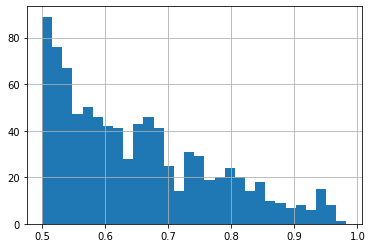

In [ ]:
df['prob_active'].hist(bins=30)

In [ ]:
#select pron of active > 90%
highactivedf = df[df['prob_active'] > 0.9].copy()

In [ ]:
highactivedf

,smiles,prob_active
8,COc1cc2c(cc1O)Cc1c-2[n+](C)cc2cc(OC)c(OC)cc12,0.933992
74,COc1cc2c(cc1O)CCC1C2CCC2(C)C(O)CCC12,0.935795
116,C=CCN1CCc2c(cc(O)c(O)c2Cl)C(c2ccccc2)C1,0.938907
126,C=Cc1c(C)c(O)cc2c1-c1ccc(O)c(C)c1CC2,0.907652
142,Oc1cc(Cl)ccc1Oc1ccc(Cl)cc1Cl,0.928241
150,Oc1cc(O)c2c(c1)O[C@H](c1cc(O)c(O)c(O)c1)[C@H](...,0.942900
154,COc1cc(C(C)c2cc3c(cc2OCCO)OCO3)cc(OC)c1OC,0.932551
183,CC(C)=Cc1cc2c(cc1O)CCC1C2CC[C@@]2(C)C1CC[C@@H]2O,0.954123
187,COc1ccccc1OCC(O)CO,0.959967
189,CCCCc1cc2c(cc1O)CCC1C2CC[C@@]2(C)C1CC[C@@H]2O,0.959111


In [ ]:
len(highactivedf)

41

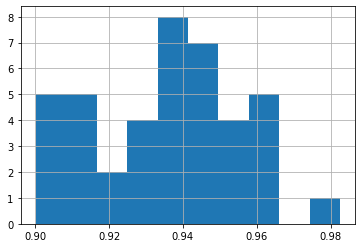

In [ ]:
highactivedf.prob_active.hist(bins=10)

In [ ]:
#max probability
highactivedf.max(axis=0)

smiles         Oc1cc(O)c2c(c1)O[C@H](c1cc(O)c(O)c(O)c1)[C@H](...
prob_active                                             0.982585
dtype: object

In [ ]:
compoundMax,_ = highactivedf.max(axis=0)
print(compoundMax)

Oc1cc(O)c2c(c1)O[C@H](c1cc(O)c(O)c(O)c1)[C@H](O)C2


In [ ]:
temp = highactivedf.sort_values('prob_active', ascending=False)

In [ ]:
temp

,smiles,prob_active
601,COc1cc([C@H]2Oc3c(OC)cc(CCCO)cc3[C@@H]2CO)ccc1O,0.982585
476,Cc1cc(Cc2cc(C)c(O)c(CO)c2)cc(CO)c1O,0.965677
187,COc1ccccc1OCC(O)CO,0.959967
195,CC(C)Cc1cc2c(cc1O)CCC1C2CC[C@@]2(C)C1CC[C@@H]2O,0.959111
189,CCCCc1cc2c(cc1O)CCC1C2CC[C@@]2(C)C1CC[C@@H]2O,0.959111
839,COc1ccc2c3c(c4cc(OC)c(OC)cc4c2c1)CN1CCC[C@H]1[...,0.958498
817,CCCc1cc2c(cc1O)CC[C@@H]1[C@@H]2CC[C@]2(C)[C@@H...,0.954123
183,CC(C)=Cc1cc2c(cc1O)CCC1C2CC[C@@]2(C)C1CC[C@@H]2O,0.954123
662,CC/C=C/c1cc2c(cc1O)CCC1C2CC[C@@]2(C)C1CC[C@@H]2O,0.954123
542,Cc1cc(C)c(C)c(OCC(=O)N2CCOCC2)c1,0.950021


In [ ]:
# temp.to_excel('/content/drive/MyDrive/AI for drug/block_SGLT2/results/active90from100000.xlsx')